# FFT and Images

The Fast Fourier Transform has inumerous application. One such application is compressing audio and images. Here we provide an example with images.

In [1]:
## Loading the autoreload extension
%load_ext autoreload
%autoreload 2

# Importing necessary libraries
import numpy as np
import scipy as scp
import time
import cv2
import urllib
import matplotlib.pyplot as plt

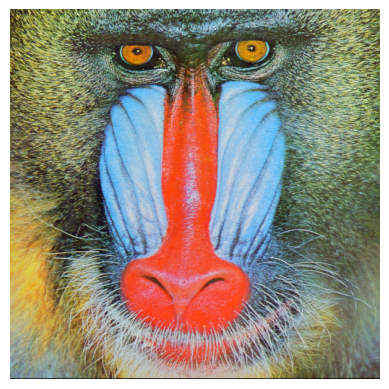

In [2]:
## Getting the image from the web

req = urllib.request.urlopen('https://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
BGRimg = cv2.imdecode(arr, -1) # 'Load it as it is'
img = np.double(cv2.cvtColor(BGRimg, cv2.COLOR_BGR2RGB)) / 255

plt.imshow(img)
plt.axis('off')
plt.show()

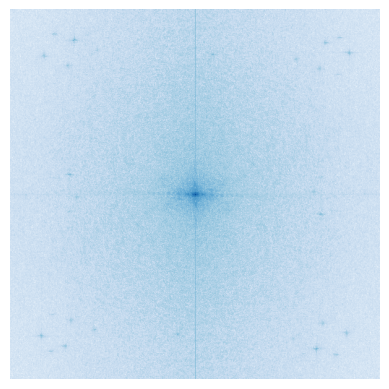

In [3]:
img_fft = np.fft.fft2(np.double(img), axes=(0, 1))
img_fft_norm = np.linalg.norm(np.abs(np.fft.fftshift(img_fft, axes=(0, 1))), axis=2)
img_fft_log = np.log(img_fft_norm)
plt.imshow( (img_fft_log - img_fft_log.min()) / (img_fft_log.max() - img_fft_log.min()), cmap='Blues')
plt.axis('off')
plt.show()

As you can see, the higher Fourier frequencies are in the middle. We will throw away some entries:

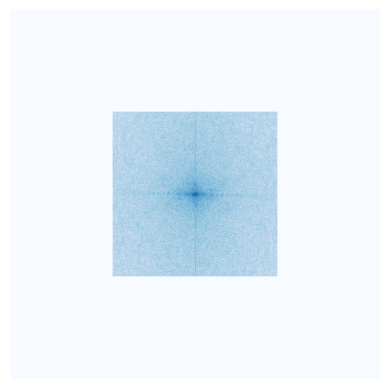

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


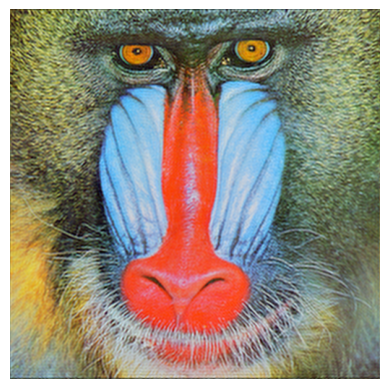

In [4]:
keep_percentage = .2 # percentage of the image values to keep
m = int((np.sqrt(keep_percentage)) * 256)

# First, we throw away the high frequencies
truncated_img_fft = img_fft.copy()
truncated_img_fft[m:-m, :] = 0
truncated_img_fft[:, m:-m] = 0
truncated_img_fft_log = np.log(np.maximum(np.linalg.norm(np.abs(np.fft.fftshift(truncated_img_fft, axes=(0, 1))), axis=2), img_fft_norm.min()))
plt.imshow((truncated_img_fft_log - truncated_img_fft_log.min()) / (truncated_img_fft_log.max() - truncated_img_fft_log.min()), cmap='Blues')
plt.axis('off')
plt.show()

truncated_img = np.fft.ifft2(truncated_img_fft, axes=(0, 1))
plt.imshow(np.abs(truncated_img))
plt.axis('off')
plt.show()

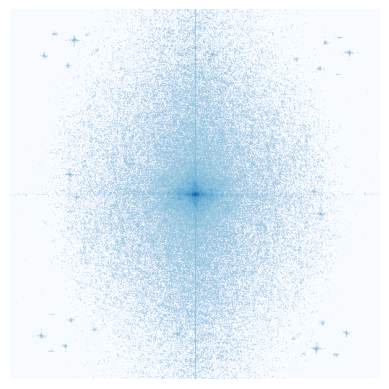

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


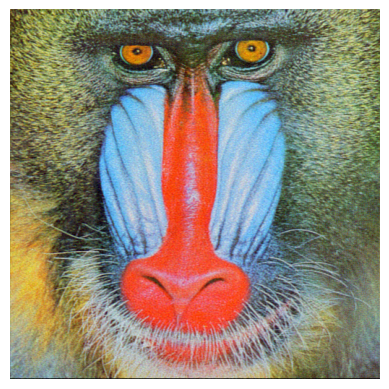

In [5]:
keep_percentage = .2 # percentage of the image values to keep
m = int((1-keep_percentage) * 512*512 * 3)

# Now, we throw away the smallest values
truncated_img_fft = img_fft.copy()
val = np.partition(np.abs(truncated_img_fft).flatten(), m)[m]
truncated_img_fft[np.abs(truncated_img_fft)< val] = 0
truncated_img_fft_log = np.log(np.maximum(np.linalg.norm(np.abs(np.fft.fftshift(truncated_img_fft, axes=(0, 1))), axis=2), img_fft_norm.min()))
plt.imshow((truncated_img_fft_log - truncated_img_fft_log.min()) / (truncated_img_fft_log.max() - truncated_img_fft_log.min()), cmap='Blues')
plt.axis('off')
plt.show()

truncated_img = np.fft.ifft2(truncated_img_fft, axes=(0, 1))
plt.imshow(np.abs(truncated_img))
plt.axis('off')
plt.show()

In both cases, we reduced the number of values stored by 5, still obtaining pretty great images. 

## Homework 7 - Singular Vector Decomposition

We are going to reuse the code to apply SVD for compressing images.

Using the array `img` obtained by the previous code, apply SVD to obtain the best rank 54 approximation of each color channel (saving the rank 54 requires approxitemaly 20% of the memory, which was the amount of memory kept before)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


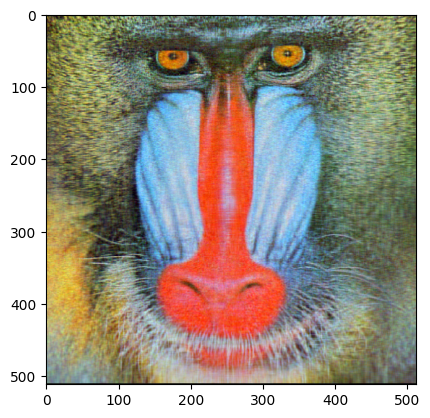

In [12]:
compressed_img = np.empty_like(img)

# Code to compress the image using SVD goes here
# Don't forget the image is not a matrix; it is 3 matrices (one for each color channel)

plt.imshow(compressed_img)